In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data preprocessing

In [3]:
dataset = pd.read_csv('./london_merged.csv')
dataset["timestamp"] = pd.to_datetime(dataset["timestamp"])
dataset.set_index("timestamp", inplace=True)

dataset["hour"] = pd.to_datetime(dataset.index).hour
dataset["day_of_month"] = pd.to_datetime(dataset.index).day
dataset["day_of_week"] = pd.to_datetime(dataset.index).dayofweek
dataset["month"] = pd.to_datetime(dataset.index).month

In [4]:
dataset.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


In [5]:
dataset.tail()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,19,3,1,1
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,20,3,1,1
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,21,3,1,1
2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,22,3,1,1
2017-01-03 23:00:00,139,5.0,1.0,76.0,22.0,2.0,0.0,0.0,3.0,23,3,1,1


In [6]:
dataset.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.00000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075,11.513265,15.751981,2.99265,6.514643
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911,6.915893,8.793704,2.00406,3.452509
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,6.000000,8.000000,1.00000,4.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,12.000000,16.000000,3.00000,7.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,18.000000,23.000000,5.00000,10.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,23.000000,31.000000,6.00000,12.000000


In [7]:
dataset.shape

(17414, 13)

## Exploratory data Analysis

In [8]:
# Resample timeseries, for plotting timeseries month frequency
df_by_month = dataset.resample("M").sum()
df_by_year = dataset.resample("Y").sum()
df_by_week = dataset.resample("W").sum()

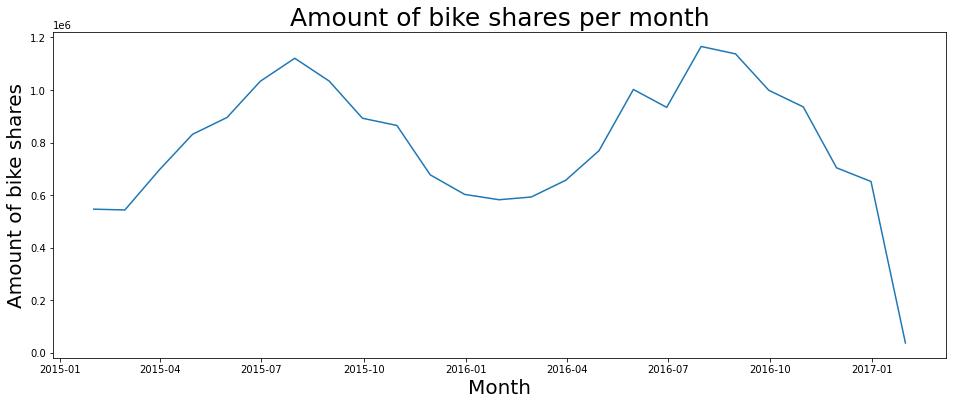

In [9]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.cnt)
ax.set_title("Amount of bike shares per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

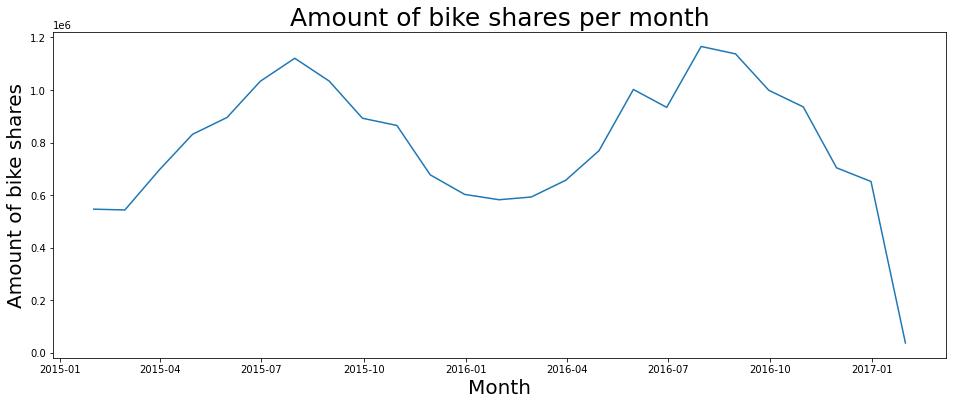

In [10]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.cnt)
ax.set_title("Amount of bike shares per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

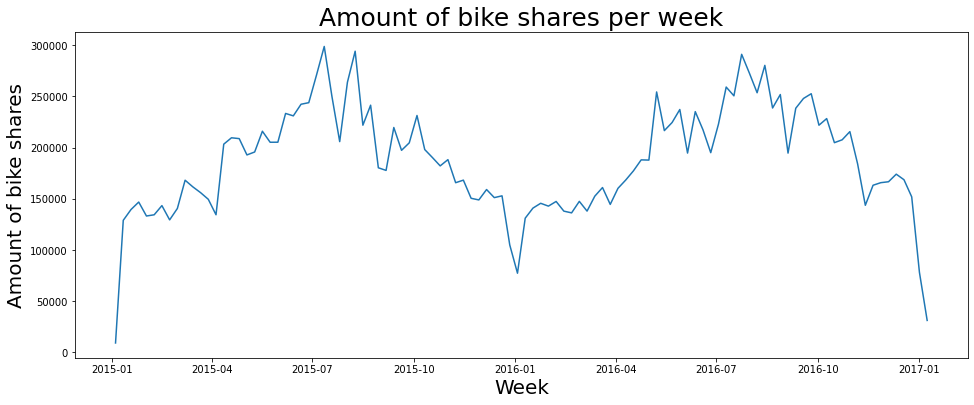

In [11]:
plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_week,x=df_by_week.index,y=df_by_week.cnt)
ax.set_title("Amount of bike shares per week", fontsize=25)
ax.set_xlabel("Week", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

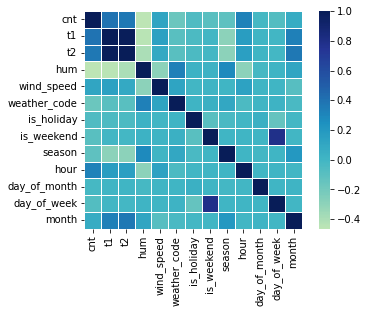

In [12]:
corr = dataset.corr()
sns.heatmap(corr,cmap="YlGnBu",square=True,linewidths=.5,center=0)
plt.show()

## LSTM Model 

In [13]:
import math
from sklearn.preprocessing import RobustScaler

training_data_len = math.ceil(len(dataset)*.9)
testing_data_len = len(dataset) - training_data_len

time_steps = 24
train, test = dataset.iloc[0:training_data_len], dataset.iloc[(training_data_len-time_steps):len(dataset)]
print(dataset.shape, train.shape, test.shape)

(17414, 13) (15673, 13) (1765, 13)


In [14]:
cols = ['t1', 't2', 'hum', 'wind_speed']
train_to_transf = train[cols].to_numpy()
test_to_transf = test[cols].to_numpy()

scaler = RobustScaler()
train.loc[:, cols] = scaler.fit_transform(train_to_transf)
test.loc[:, cols] = scaler.fit_transform(test_to_transf)

train['cnt'] = scaler.fit_transform(train[['cnt']])
test['cnt'] = scaler.fit_transform(test[['cnt']])

/home/winston/notebook/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/home/winston/notebook/lib/python3.9/site-packages/pandas/core/indexing.py:1835: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/tmp/ipykernel_12721/1779283849.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [18]:
x_train = []
y_train = []

for i in range(len(train) - time_steps):
    x_train.append(train.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    y_train.append(train.loc[:,'cnt'].iloc[i + time_steps])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [19]:
x_test = []
y_test = dataset.loc[:,'cnt'].iloc[training_data_len:len(dataset)]

for i in range(len(test) - time_steps):
    x_test.append(test.drop(columns='cnt').iloc[i:i + time_steps].to_numpy())
    # y_test.append(test.loc[:,'cnt'].iloc[i + time_steps])

#Convert x_test and y_test to numpy arrays
x_test = np.array(x_test)
y_test = np.array(y_test)

In [20]:
# All 12 columns of the data
print('Train size:')
print(x_train.shape, y_train.shape)
print('Test size:')
print(x_test.shape, y_test.shape)

Train size:
(15649, 24, 12) (15649,)
Test size:
(1741, 24, 12) (1741,)


In [32]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout , LSTM , Bidirectional 

model = Sequential()
model.add(Bidirectional(LSTM(50,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer="adam",loss="mse")

history = model.fit(x_train, y_train, epochs=50, batch_size=24, validation_split=0.1, shuffle=True)

Epoch 1/50
587/587 [==============================] - 8s 10ms/step - loss: 0.3357 - val_loss: 0.3376
Epoch 2/50
587/587 [==============================] - 6s 10ms/step - loss: 0.1706 - val_loss: 0.1159
Epoch 3/50
587/587 [==============================] - 6s 11ms/step - loss: 0.0874 - val_loss: 0.0877
Epoch 4/50
587/587 [==============================] - 7s 11ms/step - loss: 0.0640 - val_loss: 0.0786
Epoch 5/50
587/587 [==============================] - 7s 11ms/step - loss: 0.0558 - val_loss: 0.0611
Epoch 6/50
587/587 [==============================] - 7s 12ms/step - loss: 0.0536 - val_loss: 0.0525
Epoch 7/50
587/587 [==============================] - 7s 13ms/step - loss: 0.0459 - val_loss: 0.0495
Epoch 8/50
587/587 [==============================] - 7s 12ms/step - loss: 0.0461 - val_loss: 0.0450
Epoch 9/50
587/587 [==============================] - 7s 11ms/step - loss: 0.0450 - val_loss: 0.0724
Epoch 10/50
587/587 [==============================] - 7s 12ms/step - loss: 0.0442 - val_lo

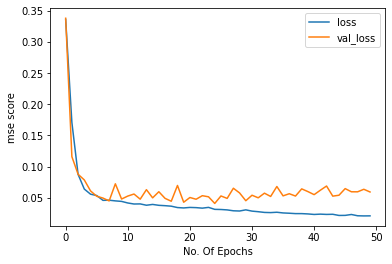

In [48]:
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("No. Of Epochs")
plt.ylabel("mse score")
plt.show()

10 epochs is more than enough to prevent overfitting 

In [50]:
y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)#Undo scaling
y_pred

array([[ 956.1792 ],
       [1431.5593 ],
       [1690.3875 ],
       ...,
       [ 481.43015],
       [ 379.99088],
       [ 248.71451]], dtype=float32)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score
rmse_lstm = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_lstm

410.12384760262177

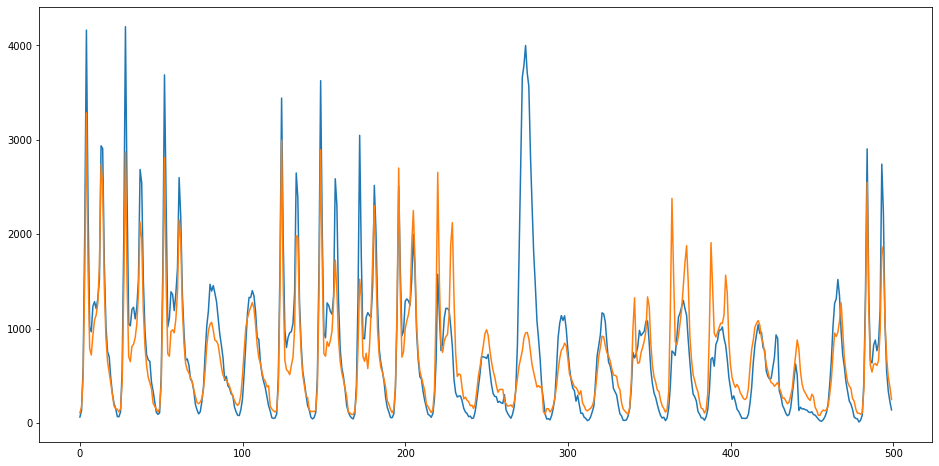

In [57]:
plt.figure(figsize=(16, 8))
plt.plot(y_test[-500:], label='true')
plt.plot(y_pred[-500:], label='predicted')
plt.show()